## Lab3. Binary Classification of Heart Disease of Patients using Deep Neural Network

Name: Nambirajan R S<br>
ROLL NO: 215229125

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X.shape

(1025, 13)

In [ ]:
y.shape

(1025,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [ ]:
X_train.shape

(820, 13)

In [ ]:
y_train.shape

(820,)

In [ ]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
model = Sequential()
model.add(Dense(8,activation= 'relu', input_dim=13))
model.add(Dense(1,activation= 'sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 112       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,y,epochs=200,batch_size=10)
print(model.predict(X_train.round()))

Epoch 1/200
103/103 [==============================] - 1s 2ms/step - loss: 0.5180 - accuracy: 0.4780
Epoch 2/200
103/103 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.4722
Epoch 3/200
103/103 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.4878
Epoch 4/200
103/103 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.4820
Epoch 5/200
103/103 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.4683
Epoch 6/200
103/103 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.4810
Epoch 7/200
103/103 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.4800
Epoch 8/200
103/103 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.4829
Epoch 9/200
103/103 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.5512
Epoch 10/200
103/103 [==============================] - 0s 1ms/step - loss: 0.3217 - accura

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100,batch_size=10, verbose=1)

Epoch 1/100
66/66 [==============================] - 0s 5ms/step - loss: 0.1089 - accuracy: 0.8506 - val_loss: 0.1831 - val_accuracy: 0.7866
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.8613 - val_loss: 0.1525 - val_accuracy: 0.7988
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.8567 - val_loss: 0.1329 - val_accuracy: 0.8049
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.8750 - val_loss: 0.1760 - val_accuracy: 0.7927
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.8521 - val_loss: 0.2057 - val_accuracy: 0.7378
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.8659 - val_loss: 0.1786 - val_accuracy: 0.7927
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.8598 - val_loss: 0.1601 - val_accuracy: 0.8110
Epoch 8/100
6

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.7854


[0.16502542793750763, 0.785365879535675]

In [ ]:
import matplotlib.pyplot as plt

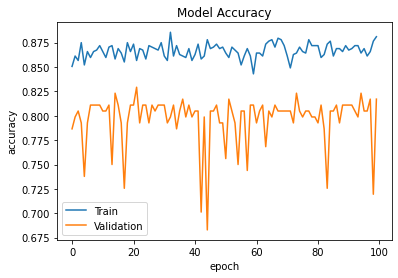

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

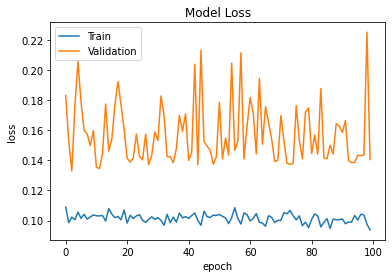

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()